In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

In [3]:
df = pd.read_csv("Health_insurance.csv")

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.shape

(1338, 7)

In [6]:
print("Number of rows = {} and number of columns = {} in Insurance data frame".format(df.shape[0], df.shape[1]))

Number of rows = 1338 and number of columns = 7 in Insurance data frame


In [7]:
print("Number of missing values in Insurance data frame")

df.isnull().sum()

Number of missing values in Insurance data frame


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print("Five point summary of numerical attributes")

df.describe().T

Five point summary of numerical attributes


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


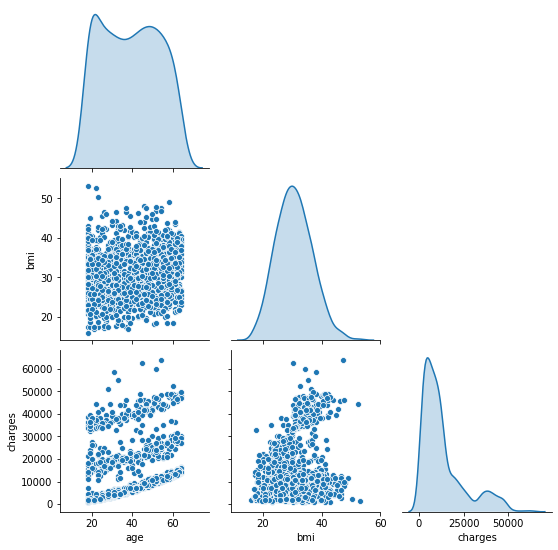

In [9]:
df_attr = df.iloc[:, [0,2,6]] # Select ‘age’, ‘bmi’ and ‘charges’ columns.

sns.pairplot(df_attr, diag_kind ="kde", corner = True); # pairplot

In [10]:
print("Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:")

df_attr.skew(axis = 0, skipna = True)

Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

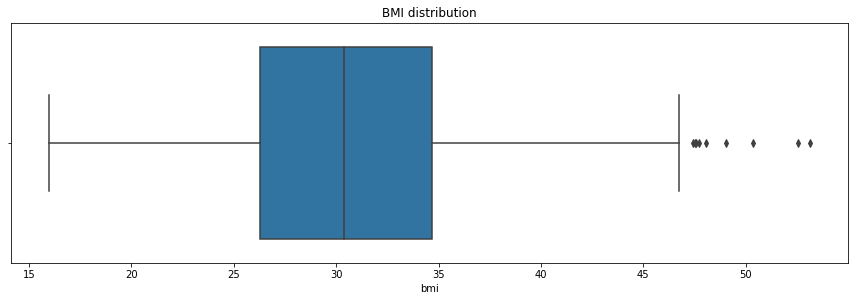

In [11]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

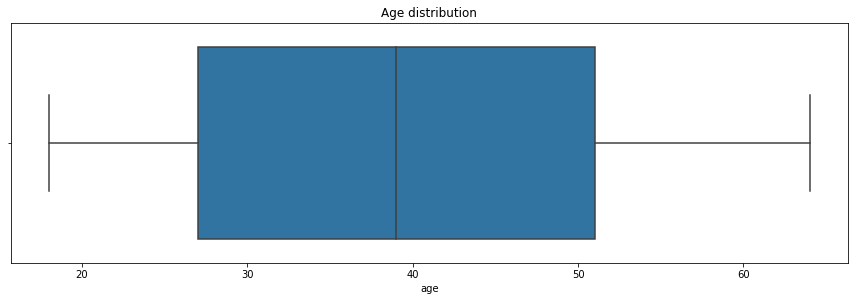

In [12]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Age distribution");
sns.boxplot(x=df['age']);
plt.show();

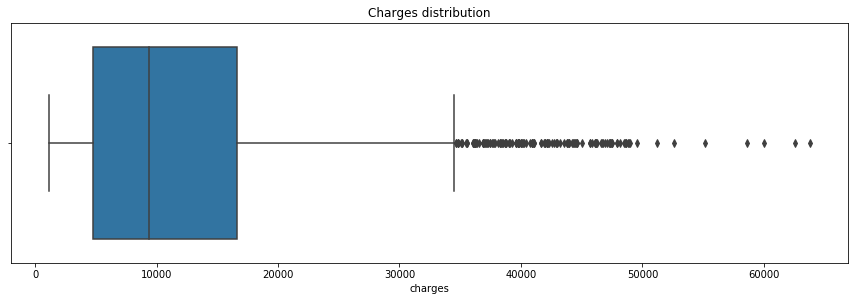

In [13]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

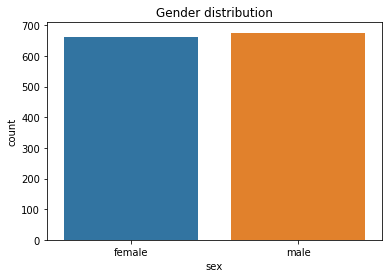

In [14]:
sns.countplot(df['sex']);
plt.title("Gender distribution");
plt.show();

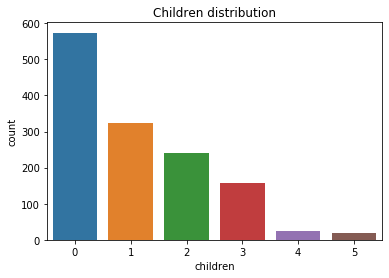

In [15]:
sns.countplot(df['children']);
plt.title("Children distribution");
plt.show();

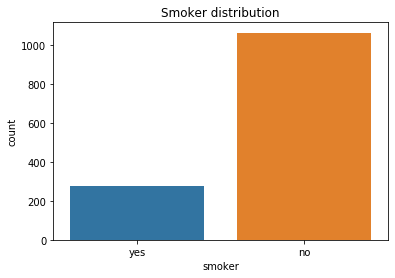

In [16]:
sns.countplot(df['smoker']);
plt.title("Smoker distribution");
plt.show();

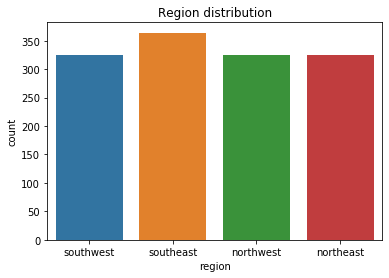

In [17]:
sns.countplot(df['region']);
plt.title("Region distribution");
plt.show();

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

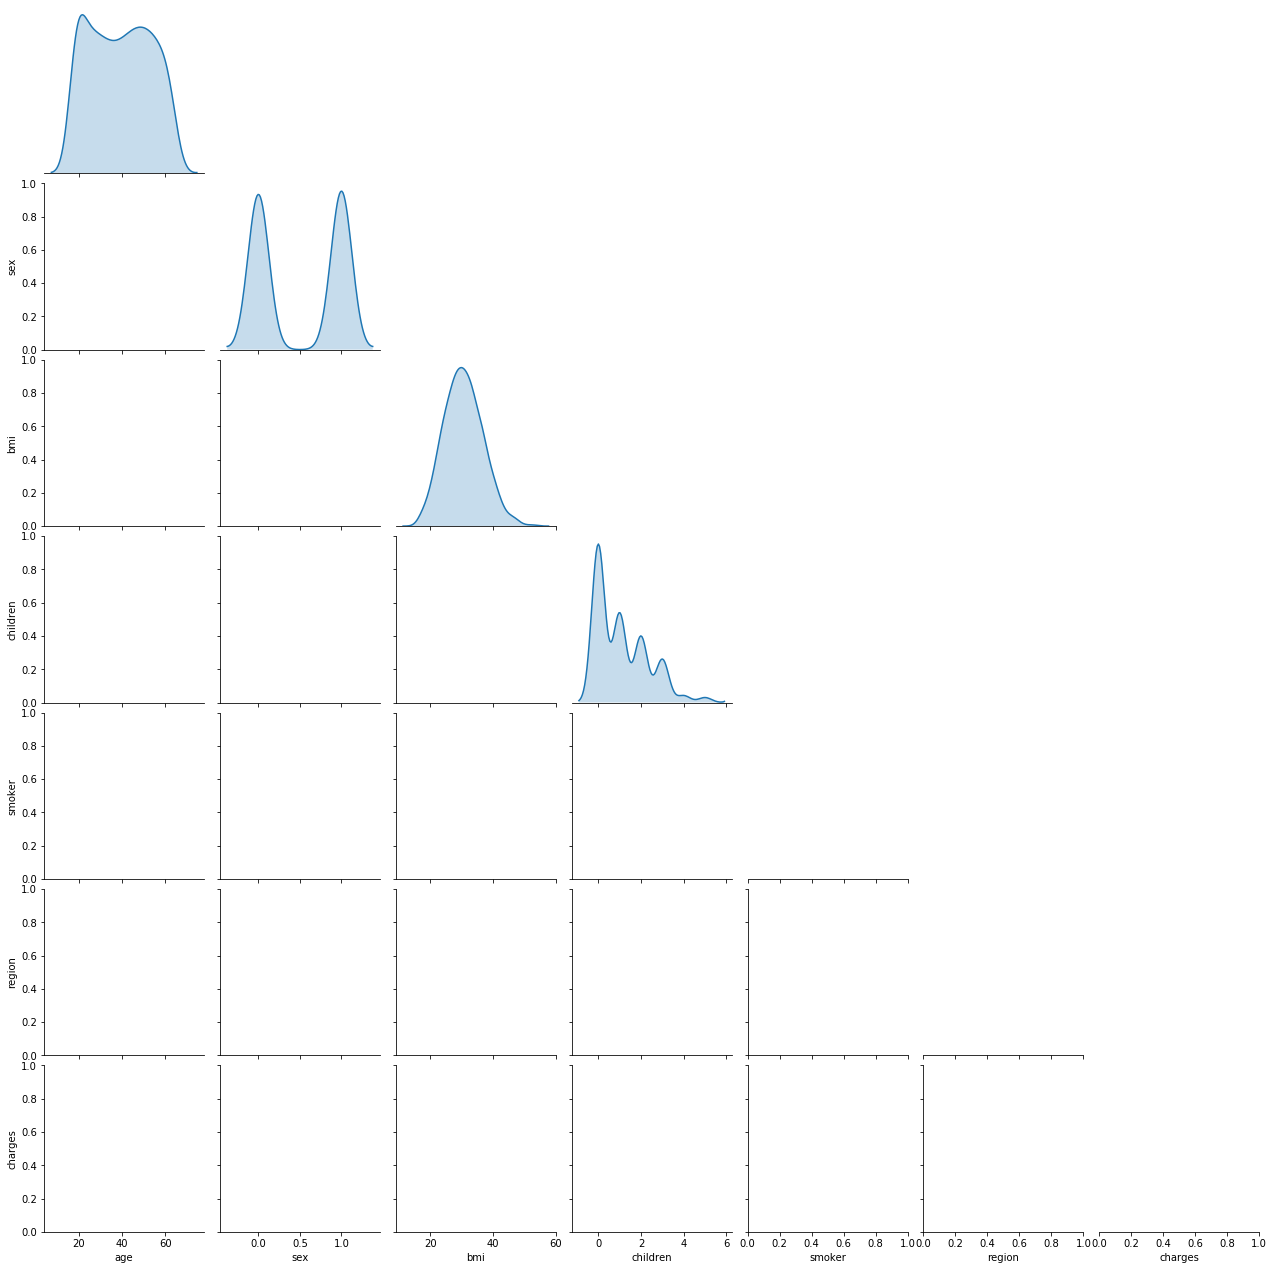

In [19]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded, diag_kind ="kde", corner = True)
plt.show()

In [20]:
df.smoker.value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

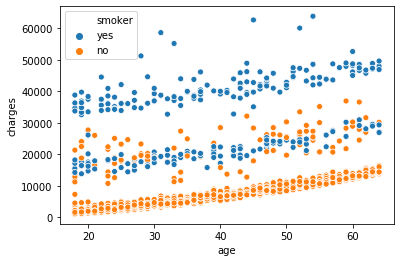

In [21]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df);

In [22]:
smoker_charges = df[df['smoker'] == 'yes'].charges
non_smoker_charges = df[df['smoker'] == 'no'].charges

t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 46.664921172723716
p_value = 8.271435842177219e-283


In [23]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


In [24]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

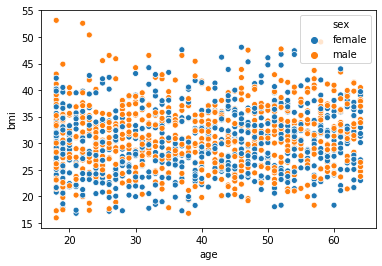

In [25]:
sns.scatterplot(x = 'age', y = 'bmi', hue = 'sex', data = df);

In [26]:
male_bmi = df[df['sex'] == 'male'].bmi
female_bmi = df[df['sex'] == 'female'].bmi

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.08997637178984932


In [27]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


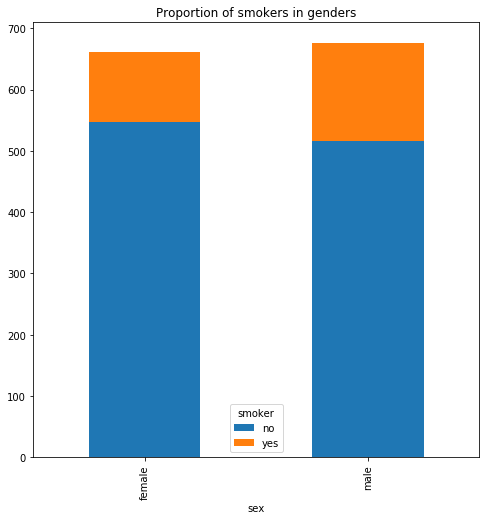

In [28]:
# Check the bmi of male and female customers accross different ages
smoker_gender_table = pd.crosstab(index=df["sex"], columns=df["smoker"])

smoker_gender_table.plot(kind="bar", figsize=(8,8), stacked=True);
plt.title('Proportion of smokers in genders')
plt.show()

In [29]:
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]

female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]

n_males = df.sex.value_counts()[0]

n_females = df.sex.value_counts()[1]

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [30]:
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.005324114164320532


In [31]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


In [32]:
# Check the bmi of women with no children, one child and two children

zero_child = df[df['children'] == 0]
women_zero_child_bmi = zero_child[zero_child['sex'] == 'female'].bmi

one_child = df[df['children'] == 1]
women_one_child_bmi = one_child[one_child['sex'] == 'female'].bmi

two_child = df[df['children'] == 2]
women_two_child_bmi = two_child[two_child['sex'] == 'female'].bmi

children_bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'children': 'zero', 'bmi':women_zero_child_bmi})
df2            = pd.DataFrame({'children': 'one', 'bmi':women_one_child_bmi})
df3            = pd.DataFrame({'children': 'two', 'bmi':women_two_child_bmi})

children_bmi_df = children_bmi_df.append(df1) 
children_bmi_df = children_bmi_df.append(df2) 
children_bmi_df = children_bmi_df.append(df3)

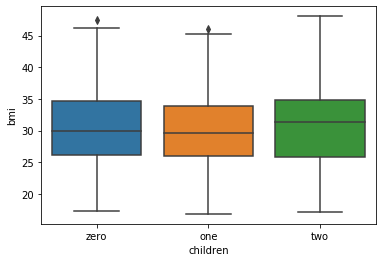

In [33]:
sns.boxplot(x = "children", y = "bmi", data = children_bmi_df);

In [34]:
mod = ols('bmi ~ children', data = children_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p_value = aov_table['PR(>F)'][0]

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [35]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False
